This report reviews the work of :Chawan, P., & Chaudhari, S. (2018). Logistic regression and SVM-based diabetes prediction system. ResearchGate. https://www.researchgate.net/profile/Pramila-Chawan/publication/326416823_LOGISTIC_REGRESSION_AND_SVM_BASED_DIABETES_PREDICTION_SYSTEM/links/5b4c80ddaca272c60947858a/LOGISTIC-REGRESSION-AND-SVM-BASED-DIABETES-PREDICTION-SYSTEM.pdf


# **1-Preprocessing**

In [ ]:
!pip install xgboost
!pip install lime
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from imblearn.over_sampling import ADASYN
import xgboost as xgb
import lime
import lime.lime_tabular
import shap
from sklearn.impute import SimpleImputer


In [ ]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


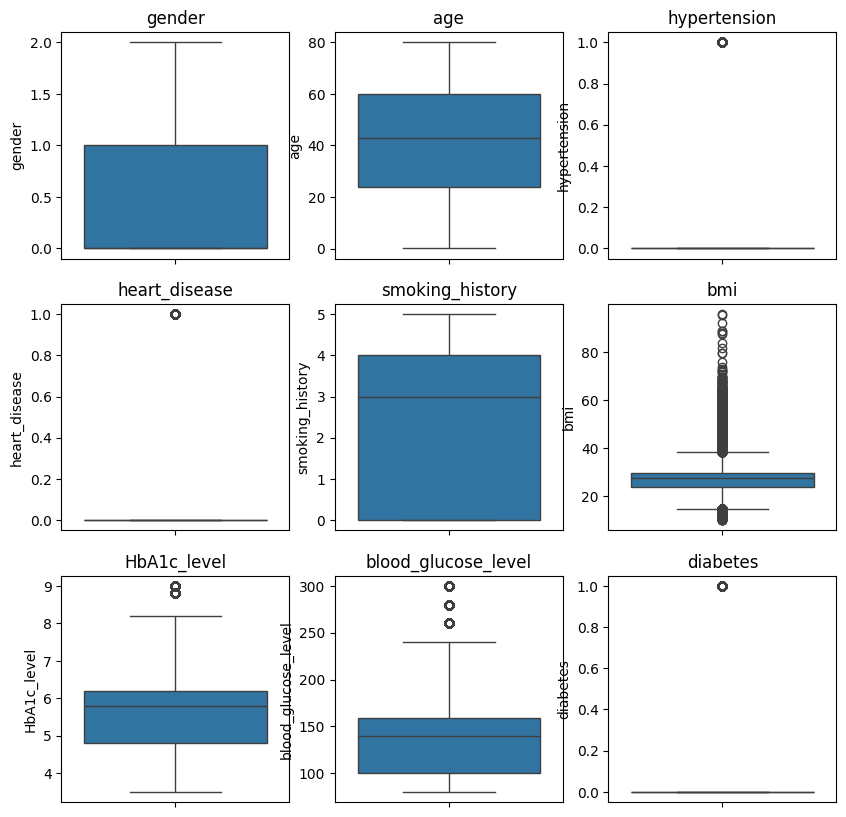

In [ ]:
col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 10))
for i, col in enumerate(col):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

In [ ]:
data = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in data:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lw = Q1 - 1.5 * IQR
    up = Q3 + 1.5* IQR
    df = df[(df[col] >= lw) & (df[col] <= up)]

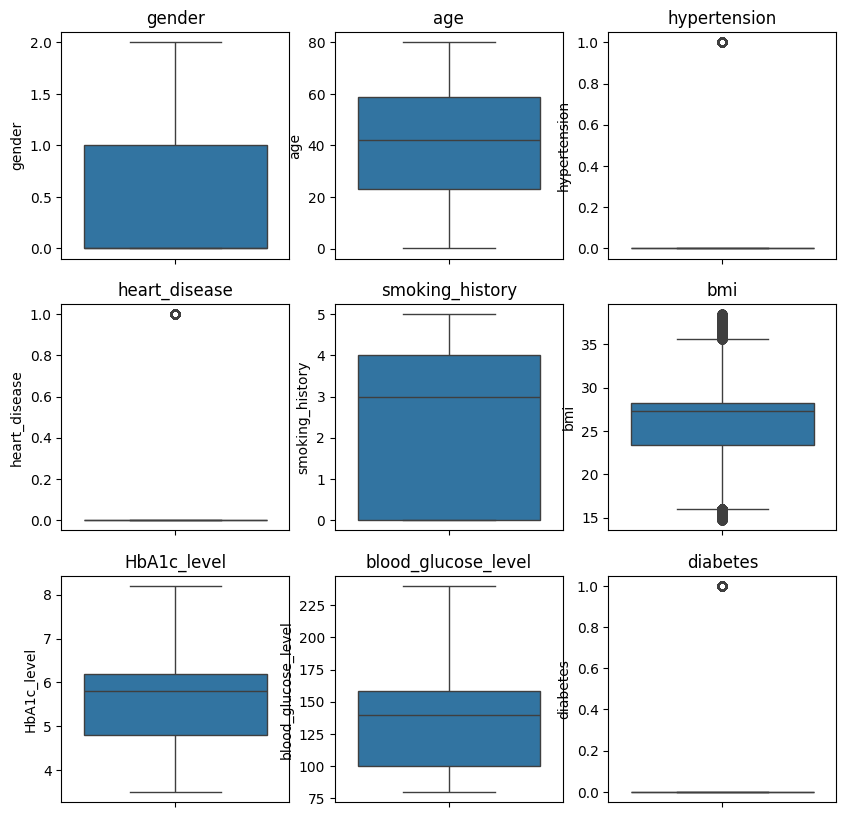

In [ ]:
col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 10))
for i, col in enumerate(col):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

# **2-EDA** implementation

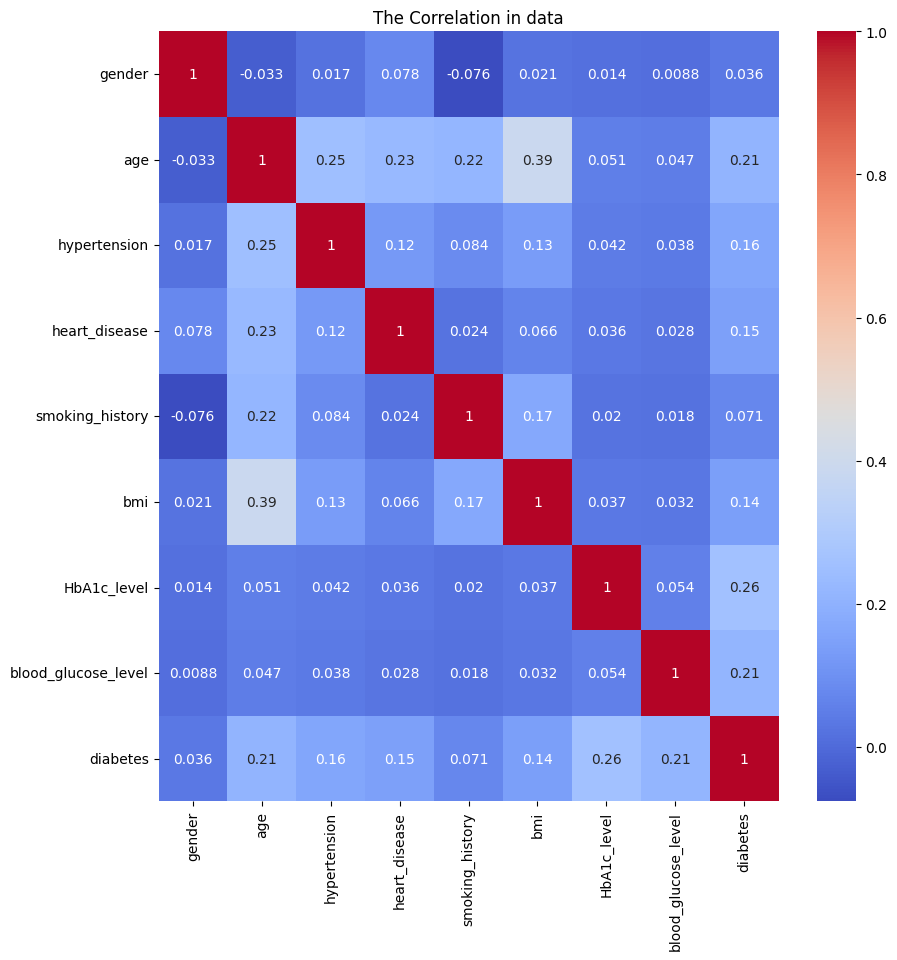

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('The Correlation in data')
plt.show()

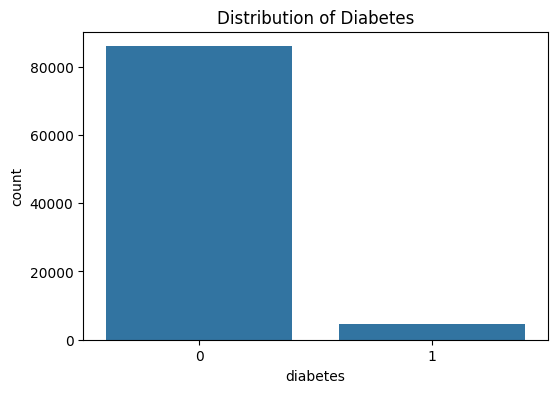

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes')
plt.show()

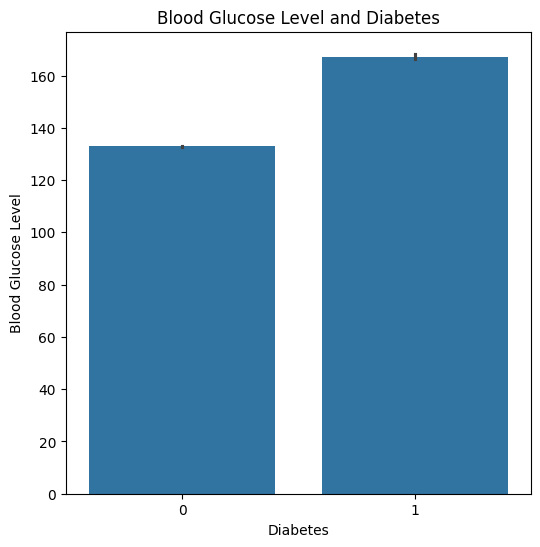

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

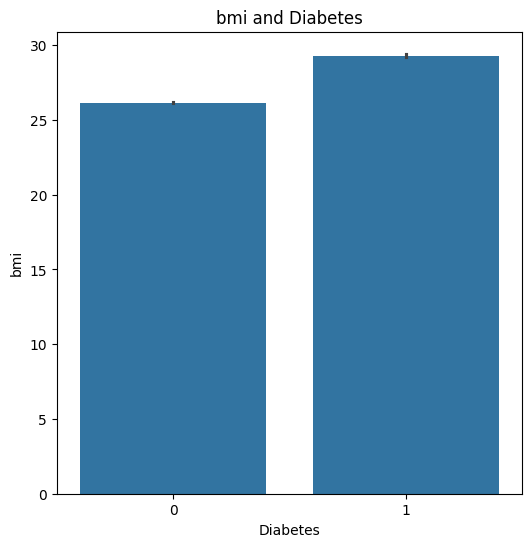

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='diabetes', y='bmi', data=df)
plt.title('bmi and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('bmi')
plt.show()

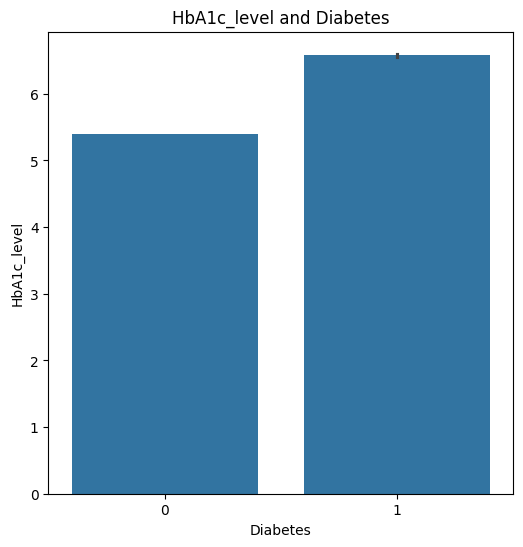

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c_level and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c_level')
plt.show()

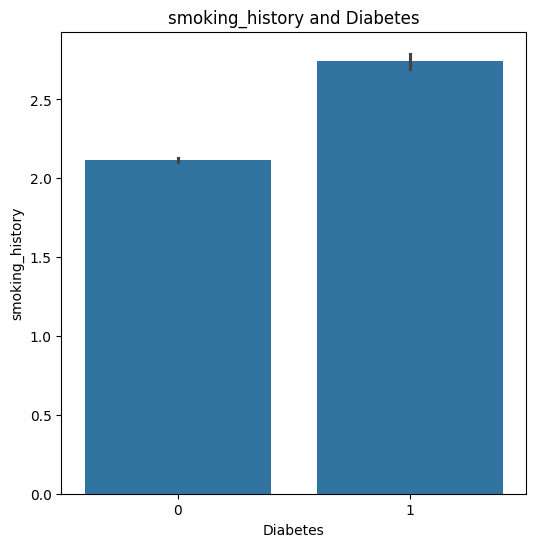

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='diabetes', y='smoking_history', data=df)
plt.title('smoking_history and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('smoking_history')
plt.show()

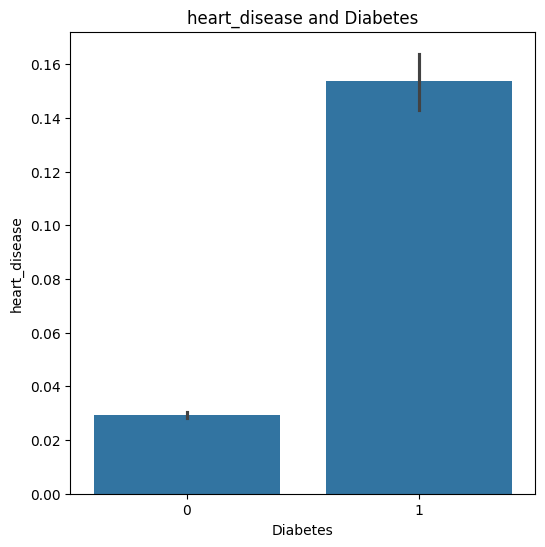

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='diabetes', y='heart_disease', data=df)
plt.title('heart_disease and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('heart_disease')
plt.show()

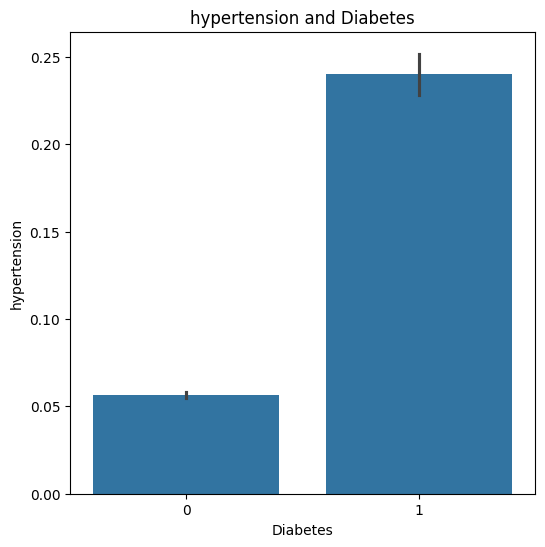

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='diabetes', y='hypertension', data=df)
plt.title('hypertension and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('hypertension')
plt.show()

# **so**, *there is a strong relation between diabetes and hypertension heart_disease , smoking_history,and HbA1c_level*

# **3**-**feature selection**

In [ ]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

# **4**- **machine learning models building**

**
Abdelrahman Khaled
in the paper that i work on , they have used two models : Logistic regression and SVM ,so i will test their claim**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_trsc = sc.fit_transform(X_train)
X_tstsc = sc.transform(X_test)

In [ ]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_trsc, y_train)
model1pred = model1.predict(X_tstsc)

In [ ]:
model2 = SVC(kernel='linear', random_state=42)
model2.fit(X_trsc, y_train)
model2pred = model2.predict(X_tstsc)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, model1pred))
print(classification_report(y_test, model1pred))

print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, model2pred))
print(classification_report(y_test, model2pred))


Logistic Regression Results:
Accuracy: 0.96332558911384
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17177
           1       0.77      0.37      0.50       901

    accuracy                           0.96     18078
   macro avg       0.87      0.68      0.74     18078
weighted avg       0.96      0.96      0.96     18078


SVM Results:
Accuracy: 0.9621086403363204
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17177
           1       0.96      0.25      0.40       901

    accuracy                           0.96     18078
   macro avg       0.96      0.63      0.69     18078
weighted avg       0.96      0.96      0.95     18078



In [ ]:
import statsmodels.api as sm
X_trsc = sm.add_constant(X_trsc)
logit_model = sm.Logit(y_train, X_trsc)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.106550
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                72309
Model:                          Logit   Df Residuals:                    72300
Method:                           MLE   Df Model:                            8
Date:                Thu, 17 Apr 2025   Pseudo R-squ.:                  0.4609
Time:                        22:46:53   Log-Likelihood:                -7704.5
converged:                       True   LL-Null:                       -14291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6220      0.059    -95.324      0.000      -5.738      -5.506
x1             0.1405      0

High absolute z-score=89.301 → Strong predictor.
p-value < 0.05=0 → Statistically significant feature.

**
Yousef Ahmed:
In the paper I'm working one, I'll use the Random Forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state=42)


model3.fit(X_trsc, y_train)


model3pred = model3.predict(X_tstsc)



ValueError: X has 8 features, but RandomForestClassifier is expecting 9 features as input.

In [ ]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, model3pred))
print(classification_report(y_test, model3pred))



Random Forest Results:


NameError: name 'model3pred' is not defined

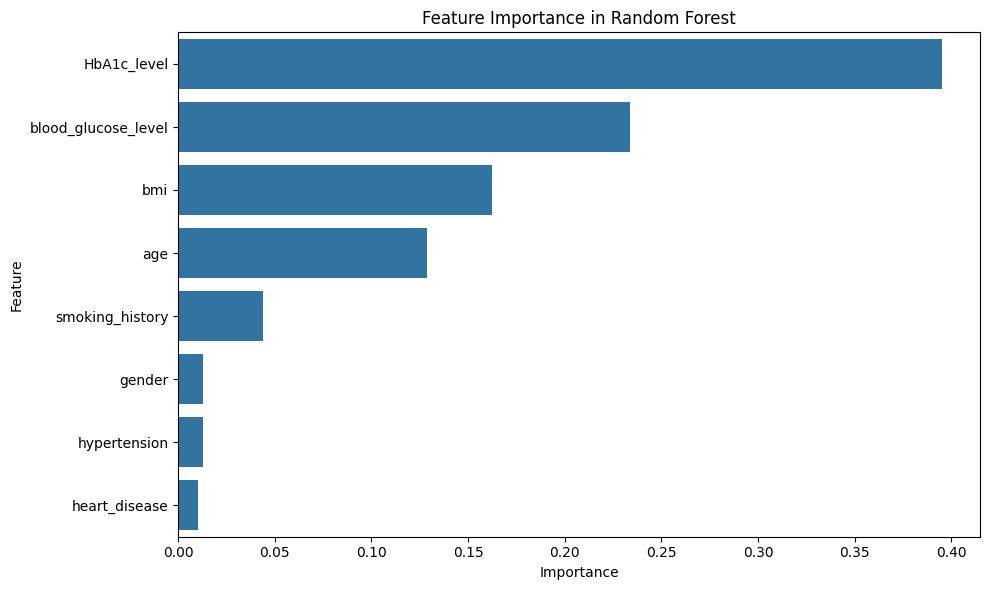

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


importances = model3.feature_importances_

feature_names = x.columns


feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances[1:]})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


***Omar Eldesoukey - 202202155: I used the XGBoost model from the paper "Diabetes prediction using machine learning and explainable AI techniques."***

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

x = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
# Convert y_train to array
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_train = imputer.fit_transform(y_train_np)
y_train = y_train.ravel() # Convert  to 1D

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_train, y_train = adasyn.fit_resample(X_train, y_train)


**Train XGBoost classifier**

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

**Evaluate the model**

In [ ]:
accuracy = accuracy_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])

print("XGBoost Results:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC:", auc)
print(classification_report(y_test, xgb_pred))

XGBoost Results:
Accuracy: 0.9684146476380131
F1 Score: 0.6442367601246106
AUC: 0.9601316242708209
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     17177
           1       0.73      0.57      0.64       901

    accuracy                           0.97     18078
   macro avg       0.86      0.78      0.81     18078
weighted avg       0.97      0.97      0.97     18078



***SHAP***

[('HbA1c_level <= 0.25', -0.7572708021595053), ('0.30 < blood_glucose_level <= 0.70', 0.17592606585331785), ('heart_disease <= -0.19', -0.021407030535972517), ('-0.28 < age <= 0.56', 0.020701385876149107), ('gender <= -0.85', 0.010446876274114952)]


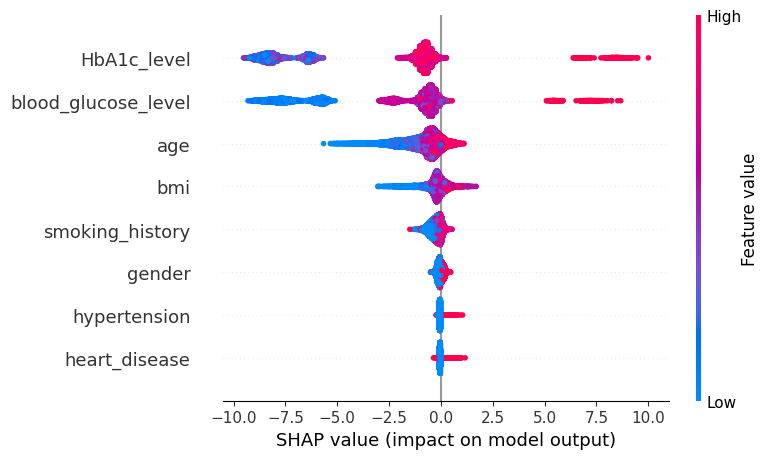

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=x.columns,
    class_names=['No Diabetes', 'Diabetes'],
    discretize_continuous=True
)
i = 0
exp = explainer.explain_instance(X_test[i], xgb_model.predict_proba, num_features=5)
print(exp.as_list())

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=x.columns)

building a neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#building the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=1)

_, accuracy = model.evaluate(X_test, y_test)
print(f'ANN Model Accuracy: {accuracy * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9495 - loss: 0.2072 - val_accuracy: 0.9470 - val_loss: 0.2745
Epoch 2/40
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9495 - loss: 0.1792 - val_accuracy: 0.9470 - val_loss: 0.1775
Epoch 3/40
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9535 - loss: 0.1549 - val_accuracy: 0.9488 - val_loss: 0.1504
Epoch 4/40
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9538 - loss: 0.1484 - val_accuracy: 0.9498 - val_loss: 0.1431
Epoch 5/40
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9535 - loss: 0.1428 - val_accuracy: 0.9504 - val_loss: 0.1466
Epoch 6/40
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9547 - loss: 0.1354 - val_accuracy: 0.9517 - val_loss: 0.1294
Epoch 7/40
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9548 - loss: 0.1328 - val_accuracy: 0.9505 - val_loss: 0.1382
Epoch 8/40
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9572 - loss: 0.1265

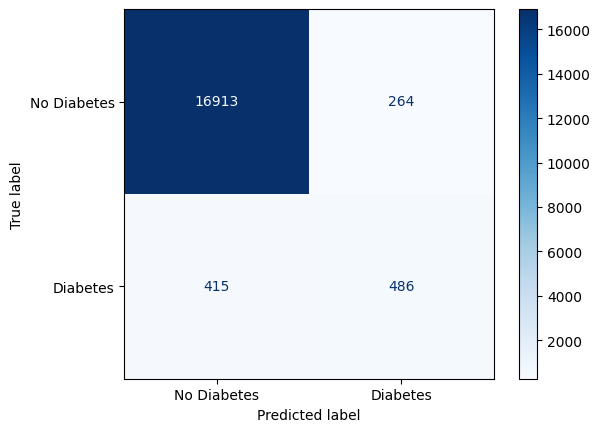

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
cm_display.plot(cmap='Blues', values_format='d')


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17177
           1       0.65      0.54      0.59       901

    accuracy                           0.96     18078
   macro avg       0.81      0.76      0.78     18078
weighted avg       0.96      0.96      0.96     18078

